# Step by Step guide on how to plot x-barS Chart

x-barS Chart is a control chart for process average, it is a variable control chart, which means that the type of observation required for it is a **continuous one**

Use x-barS chart if your subgroup size is few i.e > 8, if it's lesser then use x-barR

In this section, we'll take you through on how to plot a mean chart.

In [1]:
#Import required package.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

### Importing data to be used

In [2]:
df = pd.read_csv('data2.csv')

In [3]:
#Printing the first five rows of the dataset
df.head()

,sample_number,A,B,C,D,E,F,G,H,I,J
0,1,11.3,10.5,12.4,12.2,12.0,12.3,12.5,12.4,12.1,11.5
1,2,9.6,11.7,13.0,11.4,12.8,12.3,12.3,12.4,12.1,11.5
2,3,11.4,12.4,11.7,11.4,12.4,12.3,12.4,12.4,12.1,11.5
3,4,12.0,11.9,13.2,11.9,12.2,12.3,12.1,12.4,12.1,11.5
4,5,12.4,11.9,11.7,11.6,10.5,12.3,12.2,12.4,12.1,11.5


In [4]:
#Creating the Mean Column, excluding the sample number column.
df['mean'] = df.iloc[:,1::].mean(axis = 1)

In [5]:
df.head()

,sample_number,A,B,C,D,E,F,G,H,I,J,mean
0,1,11.3,10.5,12.4,12.2,12.0,12.3,12.5,12.4,12.1,11.5,11.92
1,2,9.6,11.7,13.0,11.4,12.8,12.3,12.3,12.4,12.1,11.5,11.91
2,3,11.4,12.4,11.7,11.4,12.4,12.3,12.4,12.4,12.1,11.5,12.00
3,4,12.0,11.9,13.2,11.9,12.2,12.3,12.1,12.4,12.1,11.5,12.16
4,5,12.4,11.9,11.7,11.6,10.5,12.3,12.2,12.4,12.1,11.5,11.86


### Next, we need to find the Range of each Sample number, i.e Difference between the Maximum observations and the minimum observations in each Sample.

In [6]:
#Creating the Mean Column, excluding the sample number column.
df['std'] = np.std(df.iloc[:,1::],axis = 1)

In [7]:
df.head()

,sample_number,A,B,C,D,E,F,G,H,I,J,mean,std
0,1,11.3,10.5,12.4,12.2,12.0,12.3,12.5,12.4,12.1,11.5,11.92,0.574931
1,2,9.6,11.7,13.0,11.4,12.8,12.3,12.3,12.4,12.1,11.5,11.91,0.872249
2,3,11.4,12.4,11.7,11.4,12.4,12.3,12.4,12.4,12.1,11.5,12.00,0.404520
3,4,12.0,11.9,13.2,11.9,12.2,12.3,12.1,12.4,12.1,11.5,12.16,0.400454
4,5,12.4,11.9,11.7,11.6,10.5,12.3,12.2,12.4,12.1,11.5,11.86,0.524318


## Next we find the mean of Means.

In [8]:
x_bar_bar = df['mean'].mean()

In [9]:
s_bar = df['std'].mean()

### The Control Limits of X-barR chart calculated as follows:
- UCL(upper control limit) = x_bar_bar + A3 * s_bar
- CL (control limit) = x_bar_bar
- LCL(lower control limit) =  x_bar_bar - A3 * s_bar

where:

    x_bar_bar = The mean of Means.
    
    s_bar = The mean of Standard Deviation.

Our A3 value depends on the **number of observations per Sample number(m)** , in this case my **m = 10**, so we're to check for A3 when **m = 10** , the quality control table to check for A3 value can be found <a href='https://www.mymathtables.com/statistic/xbar-rchart-table.html'>here</a>

Alternatively, let's we can also webscrape it here:


In [10]:
#using requests to connect to the webpage
req = requests.get('https://www.mymathtables.com/statistic/xbar-rchart-table.html')

In [11]:
soup = BeautifulSoup(req.text,'lxml')

In [12]:
#Webscraping the table
table = pd.read_html(str(soup.find('table')),flavor = 'lxml')[0]

In [13]:
table

,Sample(Size = m),A2,A3,d2,D3,D4,B3,B4
0,2.0,1.880,2.659,1.128,0,3.267,0,3.267
1,3.0,1.023,1.954,1.693,0,2.574,0,2.568
2,4.0,0.729,1.628,2.059,0,2.282,0,2.266
3,5.0,0.577,1.427,2.326,0,2.114,0,2.089
4,6.0,0.483,1.287,2.534,0,2.004,0.030,1.970
5,7.0,0.419,1.182,2.704,0.076,1.924,0.118,1.882
6,8.0,0.373,1.099,2.847,0.136,1.864,0.185,1.815
7,9.0,0.337,1.032,2.970,0.184,1.816,0.239,1.761
8,10.0,0.308,0.975,3.078,0.223,1.777,0.284,1.716
9,11.0,0.285,0.927,3.173,0.256,1.744,0.321,1.679


### From the table above, we can see that the corresponding value for A2 when m is 5 is 0.577, we can now find UCL and LCL for x_bar chart

In [14]:
A3 = 0.886
print('A3 value is: ',A3)
UCL = x_bar_bar + A3 * s_bar
print('UCL value is: ',UCL)
LCL = x_bar_bar - A3 * s_bar
print('LCL value is: ',LCL)
CL = x_bar_bar 
print('CL value is: ',CL)

A3 value is:  0.886
UCL value is:  12.68733635422932
LCL value is:  11.59966364577068
CL value is:  12.1435


### Now, let's plot the Chart:

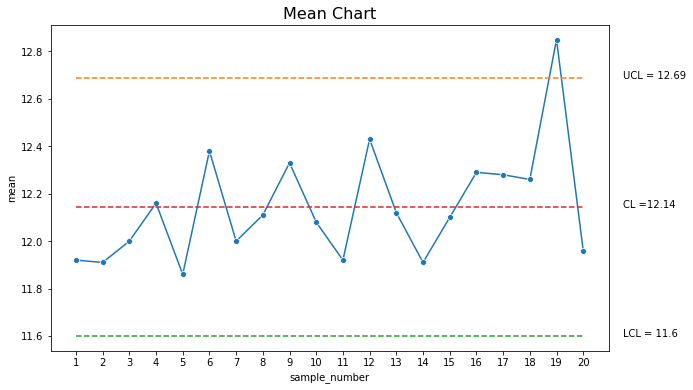

In [15]:
plt.figure(figsize = [10,6])
sns.lineplot(data = df, x = 'sample_number', y = 'mean', marker = 'o')
sns.lineplot(data = df, x = 'sample_number', y = UCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_number', y =  LCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_number', y = CL,linestyle = 'dashed')
plt.text(df.sample_number.max() + 1.5,LCL, 'LCL = ' + str(round(LCL,2)))
plt.text(df.sample_number.max() + 1.5,UCL,'UCL = ' + str(round(UCL,2)))
plt.text(df.sample_number.max() + 1.5,CL,'CL =' + str(round(CL,2)))
plt.title('Mean Chart',fontsize = 16);
plt.xticks(range(min(df['sample_number']),max(df['sample_number'])+1));
plt.show()

#### After plotting the Means on the Y axis and the Sample number on the X axis, we noticed that sample number 19 was out of control,so we remove it and plot the graph again

In [16]:
#Dropping index 18
df = df.drop(18)

In [17]:
#Resetting the index
df = df.reset_index(drop = True)

In [18]:
#Numbering the sample number again,so that we can have 1-19
count = 1
for a in range(df.shape[0]):
    df['sample_number'][a] = count
    count+=1

C:\Users\admin\AppData\Local\Temp/ipykernel_6044/452911733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sample_number'][a] = count


In [19]:
df

,sample_number,A,B,C,D,E,F,G,H,I,J,mean,std
0,1,11.3,10.5,12.4,12.2,12.0,12.3,12.5,12.4,12.1,11.5,11.92,0.574931
1,2,9.6,11.7,13.0,11.4,12.8,12.3,12.3,12.4,12.1,11.5,11.91,0.872249
2,3,11.4,12.4,11.7,11.4,12.4,12.3,12.4,12.4,12.1,11.5,12.00,0.404520
3,4,12.0,11.9,13.2,11.9,12.2,12.3,12.1,12.4,12.1,11.5,12.16,0.400454
4,5,12.4,11.9,11.7,11.6,10.5,12.3,12.2,12.4,12.1,11.5,11.86,0.524318
5,6,13.8,12.5,13.9,11.9,11.4,12.3,12.0,12.4,12.1,11.5,12.38,0.770832
6,7,13.3,11.6,13.2,10.7,11.4,12.3,11.5,12.4,12.1,11.5,12.00,0.744678
7,8,11.1,11.3,13.2,12.8,12.0,12.3,12.5,12.3,12.1,11.5,12.11,0.599166
8,9,12.5,11.9,13.8,11.6,13.0,12.3,12.5,12.1,12.1,11.5,12.33,0.616515
9,10,12.1,11.7,12.0,11.7,12.9,12.3,12.5,12.0,12.1,11.5,12.08,0.373679


### Now, let's plot the graph

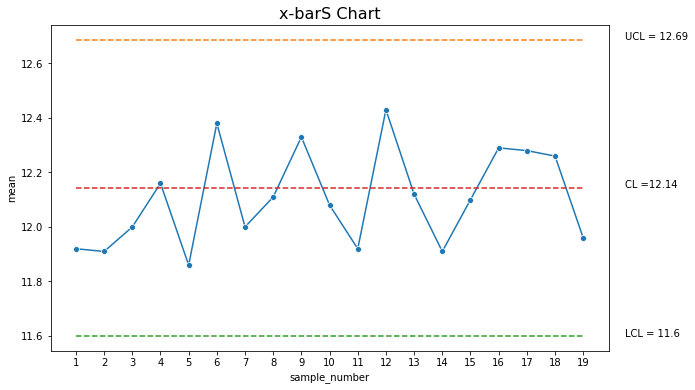

In [20]:
plt.figure(figsize = [10,6])
sns.lineplot(data = df, x = 'sample_number', y = 'mean', marker = 'o')
sns.lineplot(data = df, x = 'sample_number', y = UCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_number', y =  LCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_number', y = CL,linestyle = 'dashed')
plt.text(df.sample_number.max() + 1.5,LCL, 'LCL = ' + str(round(LCL,2)))
plt.text(df.sample_number.max() + 1.5,UCL,'UCL = ' + str(round(UCL,2)))
plt.text(df.sample_number.max() + 1.5,CL,'CL =' + str(round(CL,2)))
plt.title('x-barS Chart',fontsize = 16);
plt.xticks(range(min(df['sample_number']),max(df['sample_number'])+1));
plt.show()